In [11]:
import pandas as pd

In [12]:
df = pd.read_csv (r"C:\Users\Dell\OneDrive\Desktop\ML PROJECT\Patient_with_abnormal_bloodpressure.csv")

In [13]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [14]:
df.shape

(2000, 15)

In [15]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [16]:
df.isnull().sum()[df.isnull().sum()*100/df.shape[0]>40]

Pregnancy    1558
dtype: int64

In [17]:
df=df.drop(['Patient_Number','Pregnancy'],axis=1 )

In [18]:
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,0,45961,48071,NaN,2,1,1
1,0,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0


In [19]:
df.Genetic_Pedigree_Coefficient.value_counts()

0.86    32
0.13    30
0.63    28
0.56    27
0.17    27
        ..
0.78    11
0.91    11
0.16    10
0.15     9
0.65     9
Name: Genetic_Pedigree_Coefficient, Length: 101, dtype: int64

In [20]:
df['Genetic_Pedigree_Coefficient']=df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].mean())

In [21]:
df.alcohol_consumption_per_day.value_counts()

253.0    11
401.0    10
302.0    10
144.0    10
485.0     9
         ..
21.0      1
406.0     1
346.0     1
244.0     1
326.0     1
Name: alcohol_consumption_per_day, Length: 488, dtype: int64

In [22]:
df['alcohol_consumption_per_day']=df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Smoking                        2000 non-null   int64  
 7   Physical_activity              2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    2000 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   i

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train , df_test = train_test_split(df, test_size=0.2)

In [26]:
df_train_x  = df_train.iloc[: , 1::]
df_train_y  =df_train.iloc[: , 0]
df_test_x  = df_test.iloc[: , 1::]
df_test_y  =df_test.iloc[: , 0]

In [27]:
df_train_x

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
942,12.07,0.24,52,36,0,1,1333,23332,297.000000,3,1,0
1658,10.09,0.32,50,13,0,1,45332,39857,438.000000,3,0,0
1184,9.15,0.94,24,22,1,0,30474,8327,251.008532,1,1,1
1491,11.01,0.61,46,41,0,0,19359,42865,449.000000,2,1,0
1226,11.34,0.85,35,24,0,0,16205,41680,71.000000,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1919,13.80,0.28,44,19,1,0,11859,44408,217.000000,1,0,0
46,11.16,0.43,40,11,1,1,48799,20332,176.000000,3,1,0
402,16.53,0.39,25,26,0,1,46204,45173,101.000000,1,0,1
981,13.44,0.06,55,30,0,0,39139,8760,444.000000,1,1,1


In [28]:
df_train_y

942     0
1658    0
1184    1
1491    0
1226    0
       ..
1919    0
46      0
402     1
981     1
1400    1
Name: Blood_Pressure_Abnormality, Length: 1600, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_df = LogisticRegression()

In [31]:
log_df.fit(df_train_x , df_train_y)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred_bp = log_df.predict(df_test_x)
pred_bp


array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
bp_tab = confusion_matrix(df_test_y , pred_bp)
bp_tab

array([[ 94,  95],
       [ 99, 112]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(df_test_y , pred_bp)*100

51.5

In [37]:
from sklearn.metrics import recall_score

In [38]:
recall_score(df_test_y , pred_bp)

0.5308056872037915

In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(df_test_y , pred_bp)

0.5410628019323671

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(df_test_y , pred_bp)

0.5358851674641149

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [44]:
roc_auc_score(df_test_y , pred_bp)

0.5140800922791444

In [45]:
pred_prob = log_df.predict_proba(df_test_x)
pred_prob

array([[0.39101261, 0.60898739],
       [0.58122418, 0.41877582],
       [0.32946952, 0.67053048],
       [0.44975913, 0.55024087],
       [0.40338722, 0.59661278],
       [0.43972826, 0.56027174],
       [0.52920154, 0.47079846],
       [0.39991   , 0.60009   ],
       [0.4565077 , 0.5434923 ],
       [0.51210945, 0.48789055],
       [0.65716437, 0.34283563],
       [0.62355079, 0.37644921],
       [0.48544125, 0.51455875],
       [0.57124896, 0.42875104],
       [0.60548809, 0.39451191],
       [0.60715792, 0.39284208],
       [0.68192055, 0.31807945],
       [0.4505995 , 0.5494005 ],
       [0.34127269, 0.65872731],
       [0.54044011, 0.45955989],
       [0.55630049, 0.44369951],
       [0.41798648, 0.58201352],
       [0.43534363, 0.56465637],
       [0.5933022 , 0.4066978 ],
       [0.53651809, 0.46348191],
       [0.53416204, 0.46583796],
       [0.31224375, 0.68775625],
       [0.62907848, 0.37092152],
       [0.54043499, 0.45956501],
       [0.54022484, 0.45977516],
       [0.

In [46]:
pred_prob[: , 1]

array([0.60898739, 0.41877582, 0.67053048, 0.55024087, 0.59661278,
       0.56027174, 0.47079846, 0.60009   , 0.5434923 , 0.48789055,
       0.34283563, 0.37644921, 0.51455875, 0.42875104, 0.39451191,
       0.39284208, 0.31807945, 0.5494005 , 0.65872731, 0.45955989,
       0.44369951, 0.58201352, 0.56465637, 0.4066978 , 0.46348191,
       0.46583796, 0.68775625, 0.37092152, 0.45956501, 0.45977516,
       0.73484842, 0.6939686 , 0.60493196, 0.41258318, 0.65852198,
       0.33202513, 0.58086526, 0.40573389, 0.63465032, 0.51221819,
       0.51298089, 0.40013295, 0.42254307, 0.38259529, 0.5571326 ,
       0.4947394 , 0.59646634, 0.38570052, 0.39516103, 0.68429816,
       0.42545466, 0.38758667, 0.58452787, 0.46247699, 0.48537234,
       0.62303097, 0.52476251, 0.54266304, 0.55598116, 0.71290745,
       0.6043624 , 0.6243095 , 0.45300229, 0.58021838, 0.5922536 ,
       0.74690872, 0.54674122, 0.46343753, 0.53321189, 0.47852178,
       0.48740351, 0.51118035, 0.55937436, 0.34816205, 0.35710

In [47]:
fpr ,tpr , ther = roc_curve(df_test_y ,pred_prob[: , 1])

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC SCORE IS 0.56')

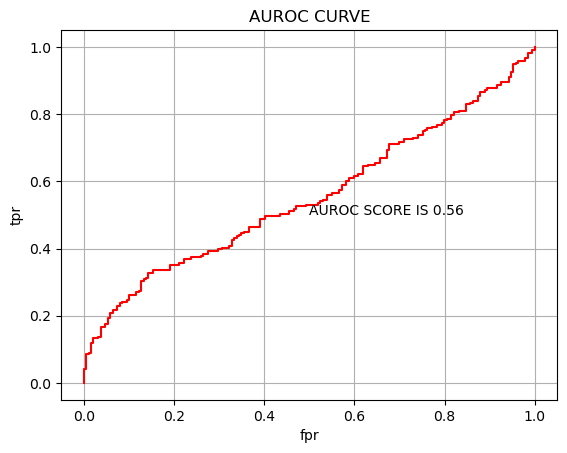

In [49]:
plt.plot(fpr, tpr , color='r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUROC CURVE")
plt.grid()
plt.text(x=0.5 , y =0.5 , s="AUROC SCORE IS 0.56")

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_bp= DecisionTreeClassifier()

In [52]:
dt_bp.fit(df_train_x , df_train_y)

DecisionTreeClassifier()

In [53]:
pred_bp1= dt_bp.predict(df_test_x)
pred_bp1


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [54]:
bp_tab1 = confusion_matrix(df_test_y , pred_bp1)
bp_tab1

array([[158,  31],
       [ 33, 178]], dtype=int64)

In [55]:
accuracy_score(df_test_y , pred_bp1)*100

84.0

In [56]:
recall_score(df_test_y , pred_bp1)*100

84.36018957345972

In [57]:
precision_score(df_test_y , pred_bp1)

0.8516746411483254

In [58]:
f1_score(df_test_y , pred_bp1)

0.8476190476190476

In [59]:
roc_auc_score(df_test_y , pred_bp1)

0.8397903658567166

In [60]:
pred_prob_dt = dt_bp.predict_proba(df_test_x)
pred_prob_dt

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [62]:
fpr ,tpr , ther = roc_curve(df_test_y ,pred_prob_dt[: , 1])

Text(0.5, 0.5, 'AUROC SCORE IS 0.82')

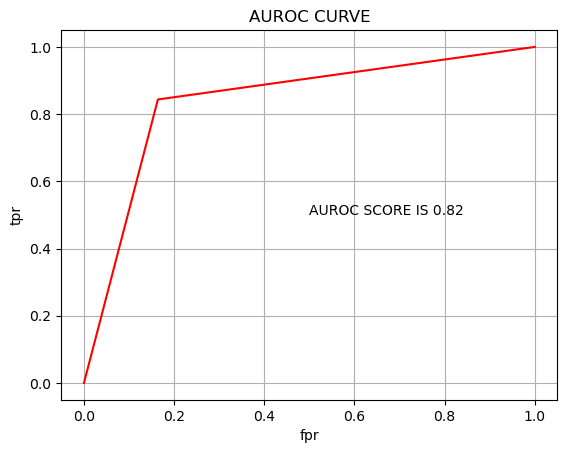

In [63]:
plt.plot(fpr, tpr , color='r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUROC CURVE")
plt.grid()
plt.text(x=0.5 , y =0.5 , s="AUROC SCORE IS 0.82")

In [64]:
from xgboost import XGBClassifier

In [65]:
df_xgb = XGBClassifier()

In [66]:
df_xgb.fit(df_train_x , df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
pred_xgb = df_xgb.predict(df_test_x)

In [68]:
tab_xgb = confusion_matrix(df_test_y , pred_xgb)
tab_xgb

array([[171,  18],
       [ 22, 189]], dtype=int64)

In [69]:
accuracy_score(df_test_y , pred_xgb)*100

90.0

In [70]:
from sklearn.metrics import classification_report

In [71]:
report = classification_report(df_test_y, pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       189
           1       0.91      0.90      0.90       211

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

